In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
# import itertools

# Warning! don't run again the data fro smoc will change

In [9]:
post_daily = np.load('../data/analysis/posterior_beach.npy', allow_pickle=True).item()
params = np.load('../data/analysis/params_beach.npy', allow_pickle=True).item()

post_smoc = np.load('../data/analysis/posterior_smoc.npy', allow_pickle=True).item()
#params_smoc = np.load('../data/analysis/params_smoc.npy', allow_pickle=True).item()

In [10]:
river_sources = np.load('../river_sources.npy', allow_pickle=True)

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


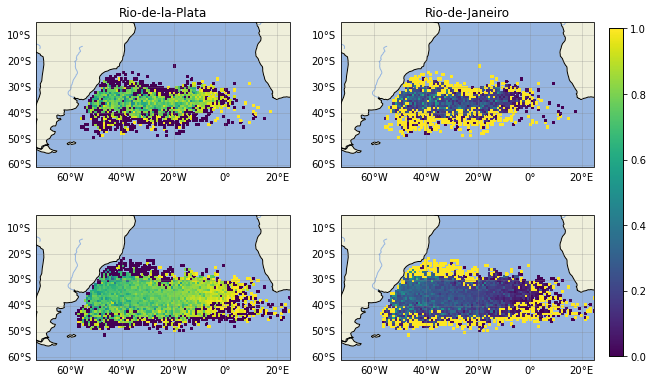

In [19]:
y,x = np.meshgrid(params['lat_range'], params['lon_range'])

t=660
labels=['Rio-de-la-Plata', 'Rio-de-Janeiro']
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6.5),
                      subplot_kw={'projection': ccrs.PlateCarree()})

ax = ax.reshape(4)

for k, loc in enumerate(labels):
    z = post_daily[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    im = ax[k].pcolormesh(x,y,z, cmap='viridis',shading='auto', vmax=1, vmin=0)
    
    z = post_smoc[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    k +=2
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    im = ax[k].pcolormesh(x,y,z, cmap='viridis',shading='auto', vmax=1, vmin=0)
    bar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=bar_ax, orientation='vertical')


first row is CMEMS daily averaged data and the second row is the hourly data SMOC.

The hourly data, spreads wider over the domain.